<div style="background-color:#F0F8FF;">
    <center>
        <h3 style="color:purple; font-size:25px; font-family:Andale Mono,monospace;">Assignment</h3>
    </center>
    <font style="font-size:20px; font-family:Andale Mono,monospace;">Training model used in this assignment are </font>
    <ul style="font-size:20px; font-family:Andale Mono,monospace;">
        <li>Perceptron</li>
        <li>Linear Regression</li>
        <li>Polynomial Regression</li>
        <li>Random Forest</li>
        <li>Decision Tree</li>
    </ul>
</div>

In [1]:
import pandas as pd
import numpy as np
seed = np.random.seed
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Perceptron, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

<div style="background-color:#F0F8FF;">
    <center>
        <h3 style="color:purple; font-size:25px; font-family:Andale Mono,monospace;">Loading Data</h3>
        <font style="font-size:20px; font-family:Andale Mono,monospace;">load data from csv files</font>
    </center>
</div>

In [2]:
X_train = pd.read_csv('./data/nba/X_train.csv')
y_train = pd.read_csv('./data/nba/y_train.csv')

X_test = pd.read_csv('./data/nba/X_test.csv')

<div style="background-color:#F0F8FF;">
    <center>
        <font style="font-size:20px; font-family:Andale Mono,monospace;">Some information about training data</font>
    </center>
</div>

In [3]:
print(X_train.shape)
print(X_train.columns)
print(y_train.columns)

(52399, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')


In [4]:
print(X_train[:4])
print(y_train[:4])

   PERIOD  GAME_CLOCK  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE  \
0       2         557        15.5         0         0.7        2.1         2   
1       2         151        20.1         0         0.8        2.7         2   
2       3         448        14.2         0         0.8        5.1         2   
3       1         279        10.6         0         0.6        1.9         2   

   CLOSE_DEF_DIST  
0             0.0  
1             3.4  
2             0.1  
3             2.7  
   FGM
0    1
1    1
2    0
3    1


<div style="background-color:#F0F8FF;">
    <center>
        <font style="font-size:20px; font-family:Andale Mono,monospace;">Turn pandas data frame into numpy array format</font>
    </center>
</div>

In [5]:
def pd2np(df):
    return df.values

In [6]:
X_orig = X_train
y_orig = y_train
X_test_orig = X_test

X_train = pd2np(X_train)
y_train = pd2np(y_train)

X_test = pd2np(X_test)

In [7]:
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(52399, 8)


<div style="background-color:#F0F8FF;">
    <center>
        <font style="font-size:20px; font-family:Andale Mono,monospace;">Separate data into training data and validity data</font>
    </center>
</div>

In [8]:
X_train_Sub, X_valid, y_train_Sub, y_valid = train_test_split(
        X_train, y_train, test_size=0.3, random_state=0)

<div style="background-color:#F0F8FF;">
    <center>
        <h3 style="color:purple; font-size:25px; font-family:Andale Mono,monospace;">Perceptron</h3>
    </center>
</div>

In [9]:
sc = StandardScaler()
sc.fit(X_train_Sub)
X_train_std = sc.transform(X_train_Sub)
X_test_std = sc.transform(X_valid)

ppn = Perceptron(max_iter=10, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train_Sub.ravel())

y_train_pred = ppn.predict(X_train_Sub)
y_pred = ppn.predict(X_test_std)
print('Training Accuracy: %.2f, Testing Accuracy: %.2f (Perceptron)' 
      % (accuracy_score(y_train_Sub, y_train_pred), accuracy_score(y_valid, y_pred)))

values = [['Training Data', 'Validity Data'],
          [accuracy_score(y_train_Sub, y_train_pred), accuracy_score(y_valid, y_pred)]]

Training Accuracy: 0.54, Testing Accuracy: 0.56 (Perceptron)


<table style="float:left; width:60%; font-size:16px;">
    <tr>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>DATA</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>ACCURACY</b>
        </th>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Training Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>54%</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Validity Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>56%</b>
        </td>
    </tr>
</table>

<div style="background-color:#F0F8FF;">
    <center>
        <h3 style="color:purple; font-size:25px; font-family:Andale Mono,monospace;">Linear Regression</h3>
        <font style="font-size:20px; font-family:Andale Mono,monospace;">1.Training with Linear Regression and its testing result</font>
    </center>
</div>

In [10]:
# Standardization
sc = StandardScaler()
sc.fit(X_train_Sub)
X_train_std = sc.transform(X_train_Sub)
X_test_std = sc.transform(X_valid)

# Training
slr = LinearRegression()
slr.fit(X_train_std, y_train_Sub)

# Testing
y_train_pred = slr.predict(X_train_std)
y_test_pred = slr.predict(X_test_std)

print('Training Accuracy: %.2f, Testing Accuracy: %.2f (Linear Regression)' 
      % (r2_score(y_train_Sub, y_train_pred), r2_score(y_valid, y_test_pred)))

Training Accuracy: 0.05, Testing Accuracy: 0.06 (Linear Regression)


<table style="float:left; width:60%; font-size:16px;">
    <tr>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>DATA</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>ACCURACY</b>
        </th>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Training Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>5%</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Validity Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>6%</b>
        </td>
    </tr>
</table>

<div style="background-color:#F0F8FF;">
    <center>
        <font style="font-size:20px; font-family:Andale Mono,monospace;">2.Training with Linear Regression Ridge and its testing result</font>
    </center>
</div>

In [11]:
lr_rg = Ridge(alpha=10)
lr_rg.fit(X_train_Sub, y_train_Sub)

y_train_pred = lr_rg.predict(X_train_Sub)
y_test_pred = lr_rg.predict(X_valid)

print('Training Accuracy: %.2f, Testing Accuracy: %.2f (Linear Regression Ridge)' 
      % (mean_squared_error(y_train_Sub, y_train_pred), mean_squared_error(y_valid, y_test_pred)))

Training Accuracy: 0.23, Testing Accuracy: 0.23 (Linear Regression Ridge)


<table style="float:left; width:60%; font-size:16px;">
    <tr>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>DATA</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>ACCURACY</b>
        </th>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Training Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>23%</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Validity Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>23%</b>
        </td>
    </tr>
</table>

<div style="background-color:#F0F8FF;">
    <center>
        <font style="font-size:20px; font-family:Andale Mono,monospace;">3.Training with Linear Regression Lasso and its testing result</font>
    </center>
</div>

In [12]:
lr_lasso = Lasso(alpha = 10)
lr_lasso.fit(X_train_Sub, y_train_Sub)

y_train_pred = lr_lasso.predict(X_train_Sub)
y_test_pred = lr_lasso.predict(X_valid)

print('Training Accuracy: %.2f, Testing Accuracy: %.2f (Linear Regression Lasso)' 
      % (mean_squared_error(y_train_Sub, y_train_pred), mean_squared_error(y_valid, y_test_pred)))

Training Accuracy: 0.25, Testing Accuracy: 0.25 (Linear Regression Lasso)


<table style="float:left; width:60%; font-size:16px;">
    <tr>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>DATA</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>ACCURACY</b>
        </th>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Training Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>25%</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Validity Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>25%</b>
        </td>
    </tr>
</table>

<div style="background-color:#F0F8FF;">
    <center>
        <h3 style="color:purple; font-size:25px; font-family:Andale Mono,monospace;">Polynomial Regression</h3>
        <font style="font-size:20px; font-family:Andale Mono,monospace;">1.Training with Polynomial Regression(Degree 3) and its testing result</font>
    </center>
</div>

In [13]:
regr = LinearRegression()

Poly = PolynomialFeatures(degree=3)
X_train_Poly = Poly.fit_transform(X_train_Sub)
X_test_Poly = Poly.fit_transform(X_valid)
regr = regr.fit(X_train_Poly, y_train_Sub)

y_train_pred = regr.predict(X_train_Poly)
y_test_pred = regr.predict(X_test_Poly)

print('Training Accuracy: %.2f, Testing Accuracy: %.2f (Polynomial Regression)' 
      % (r2_score(y_train_Sub, y_train_pred), r2_score(y_valid, y_test_pred)))

Training Accuracy: 0.07, Testing Accuracy: 0.05 (Polynomial Regression)


<table style="float:left; width:60%; font-size:16px;">
    <tr>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>DATA</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>ACCURACY</b>
        </th>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Training Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>7%</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Validity Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>5%</b>
        </td>
    </tr>
</table>

<div style="background-color:#F0F8FF;">
    <center>
        <font style="font-size:20px; font-family:Andale Mono,monospace;">2.Training with Polynomial Regression(Degree 3) Ridge and its testing result</font>
    </center>
</div>

In [14]:
X_Poly = Poly.fit_transform(X_train)
X_train_Subp, X_validp, y_train_Subp, y_validp = train_test_split(
    X_Poly, y_train, test_size=0.3, random_state=0)

lr_rg = Ridge(alpha=10)
lr_rg.fit(X_train_Subp, y_train_Subp.ravel())

y_train_predp = lr_rg.predict(X_train_Subp)
y_test_predp = lr_rg.predict(X_validp)

print('Training Accuracy: %.2f, Testing Accuracy: %.2f (Polynomial Regression Ridge)' 
      % (mean_squared_error(y_train_Subp, y_train_predp), mean_squared_error(y_validp, y_test_predp)))

Training Accuracy: 0.23, Testing Accuracy: 0.26 (Polynomial Regression Ridge)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.924964e-20
  overwrite_a=True).T


<table style="float:left; width:60%; font-size:16px;">
    <tr>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>DATA</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>ACCURACY</b>
        </th>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Training Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>23%</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Validity Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>26%</b>
        </td>
    </tr>
</table>

<div style="background-color:#F0F8FF;">
    <center>
        <font style="font-size:20px; font-family:Andale Mono,monospace;">3.Training with Polynomial Regression(Degree 3) Lasso and its testing result</font>
    </center>
</div>

In [15]:
X_Poly = Poly.fit_transform(X_train)
X_train_Subp, X_validp, y_train_Subp, y_validp = train_test_split(
    X_Poly, y_train, test_size=0.3, random_state=0)

lr_lasso = Lasso(alpha = 10)
lr_lasso.fit(X_train_Subp, y_train_Subp.ravel())

y_train_predp = lr_lasso.predict(X_train_Subp)
y_test_predp = lr_lasso.predict(X_validp)

print('Training Accuracy: %.2f, Testing Accuracy: %.2f (Polynomial Regression Lasso)' 
      % (mean_squared_error(y_train_Subp, y_train_predp), mean_squared_error(y_validp, y_test_predp)))

Training Accuracy: 0.24, Testing Accuracy: 0.23 (Polynomial Regression Lasso)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<table style="float:left; width:60%; font-size:16px;">
    <tr>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>DATA</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>ACCURACY</b>
        </th>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Training Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>24%</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Validity Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>23%</b>
        </td>
    </tr>
</table>

<div style="background-color:#F0F8FF;">
    <center>
        <h3 style="color:purple; font-size:25px; font-family:Andale Mono,monospace;">Random Forest Regression</h3>
    </center>
</div>

In [16]:
forest_Regr = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest_Regr.fit(X_train_Sub, y_train_Sub.ravel())

y_train_pred = forest_Regr.predict(X_train_Sub)
y_test_pred = forest_Regr.predict(X_valid)

print('Training Accuracy: %.2f, Testing Accuracy: %.2f (Random Forest Regression)' 
      % (r2_score(y_train_Sub, y_train_pred), r2_score(y_valid, y_test_pred)))

Training Accuracy: 0.87, Testing Accuracy: 0.04 (Random Forest Regression)


<table style="float:left; width:60%; font-size:16px;">
    <tr>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>DATA</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>ACCURACY</b>
        </th>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Training Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>87%</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Validity Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>4%</b>
        </td>
    </tr>
</table>

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">It's easy to see that the training model is overfit.</font>

    <center>
        <h3 style="color:purple; font-size:25px; font-family:Andale Mono,monospace;">Decision Tree Regression</h3>
    </center>
</div>

In [17]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train_Sub, y_train_Sub)

y_train_pred = tree.predict(X_train_Sub)
y_test_pred = tree.predict(X_valid)

print('Training Accuracy: %.2f, Testing Accuracy: %.2f (Decision Tree Regression)' 
      % (r2_score(y_train_Sub, y_train_pred), r2_score(y_valid, y_test_pred)))

Training Accuracy: 0.06, Testing Accuracy: 0.07 (Decision Tree Regression)


<table style="float:left; width:60%; font-size:16px;">
    <tr>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>DATA</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>ACCURACY</b>
        </th>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Training Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>6%</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Validity Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>7%</b>
        </td>
    </tr>
</table>

<div style="background-color:#F0F8FF;">
    <center>
        <h3 style="color:purple; font-size:25px; font-family:Andale Mono,monospace;">Random Forest Classifier</h3>
    </center>
</div>

In [18]:
# criterion : impurity function
# n_estimators :  number of decision trees
# random_state : seed used by the random number generator
# n_jobs : number of cores for parallelism
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=1000, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train_Sub, y_train_Sub.ravel())

y_train_pred = forest.predict(X_train_Sub)
y_pred = forest.predict(X_valid)
print('Training Accuracy: %.2f, Testing Accuracy: %.2f (Random Forest Classifier)'
      % (accuracy_score(y_train_Sub, y_train_pred), accuracy_score(y_valid, y_pred)))

Training Accuracy: 1.00, Testing Accuracy: 0.60 (Random Forest Classifier)


<table style="float:left; width:60%; font-size:16px;">
    <tr>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>DATA</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>ACCURACY</b>
        </th>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Training Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>100%</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Validity Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>60%</b>
        </td>
    </tr>
</table>

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">Feature Importance</font>
</div>

In [19]:
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train_Sub.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X_orig.columns.values[indices[f]], 
                            importances[indices[f]]))

 1) GAME_CLOCK                     0.200543
 2) SHOT_DIST                      0.200395
 3) SHOT_CLOCK                     0.177387
 4) CLOSE_DEF_DIST                 0.173480
 5) TOUCH_TIME                     0.140362
 6) PERIOD                         0.052591
 7) DRIBBLES                       0.048067
 8) PTS_TYPE                       0.007175


<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">Plot all accuracy with all possible features pair</font>
</div>

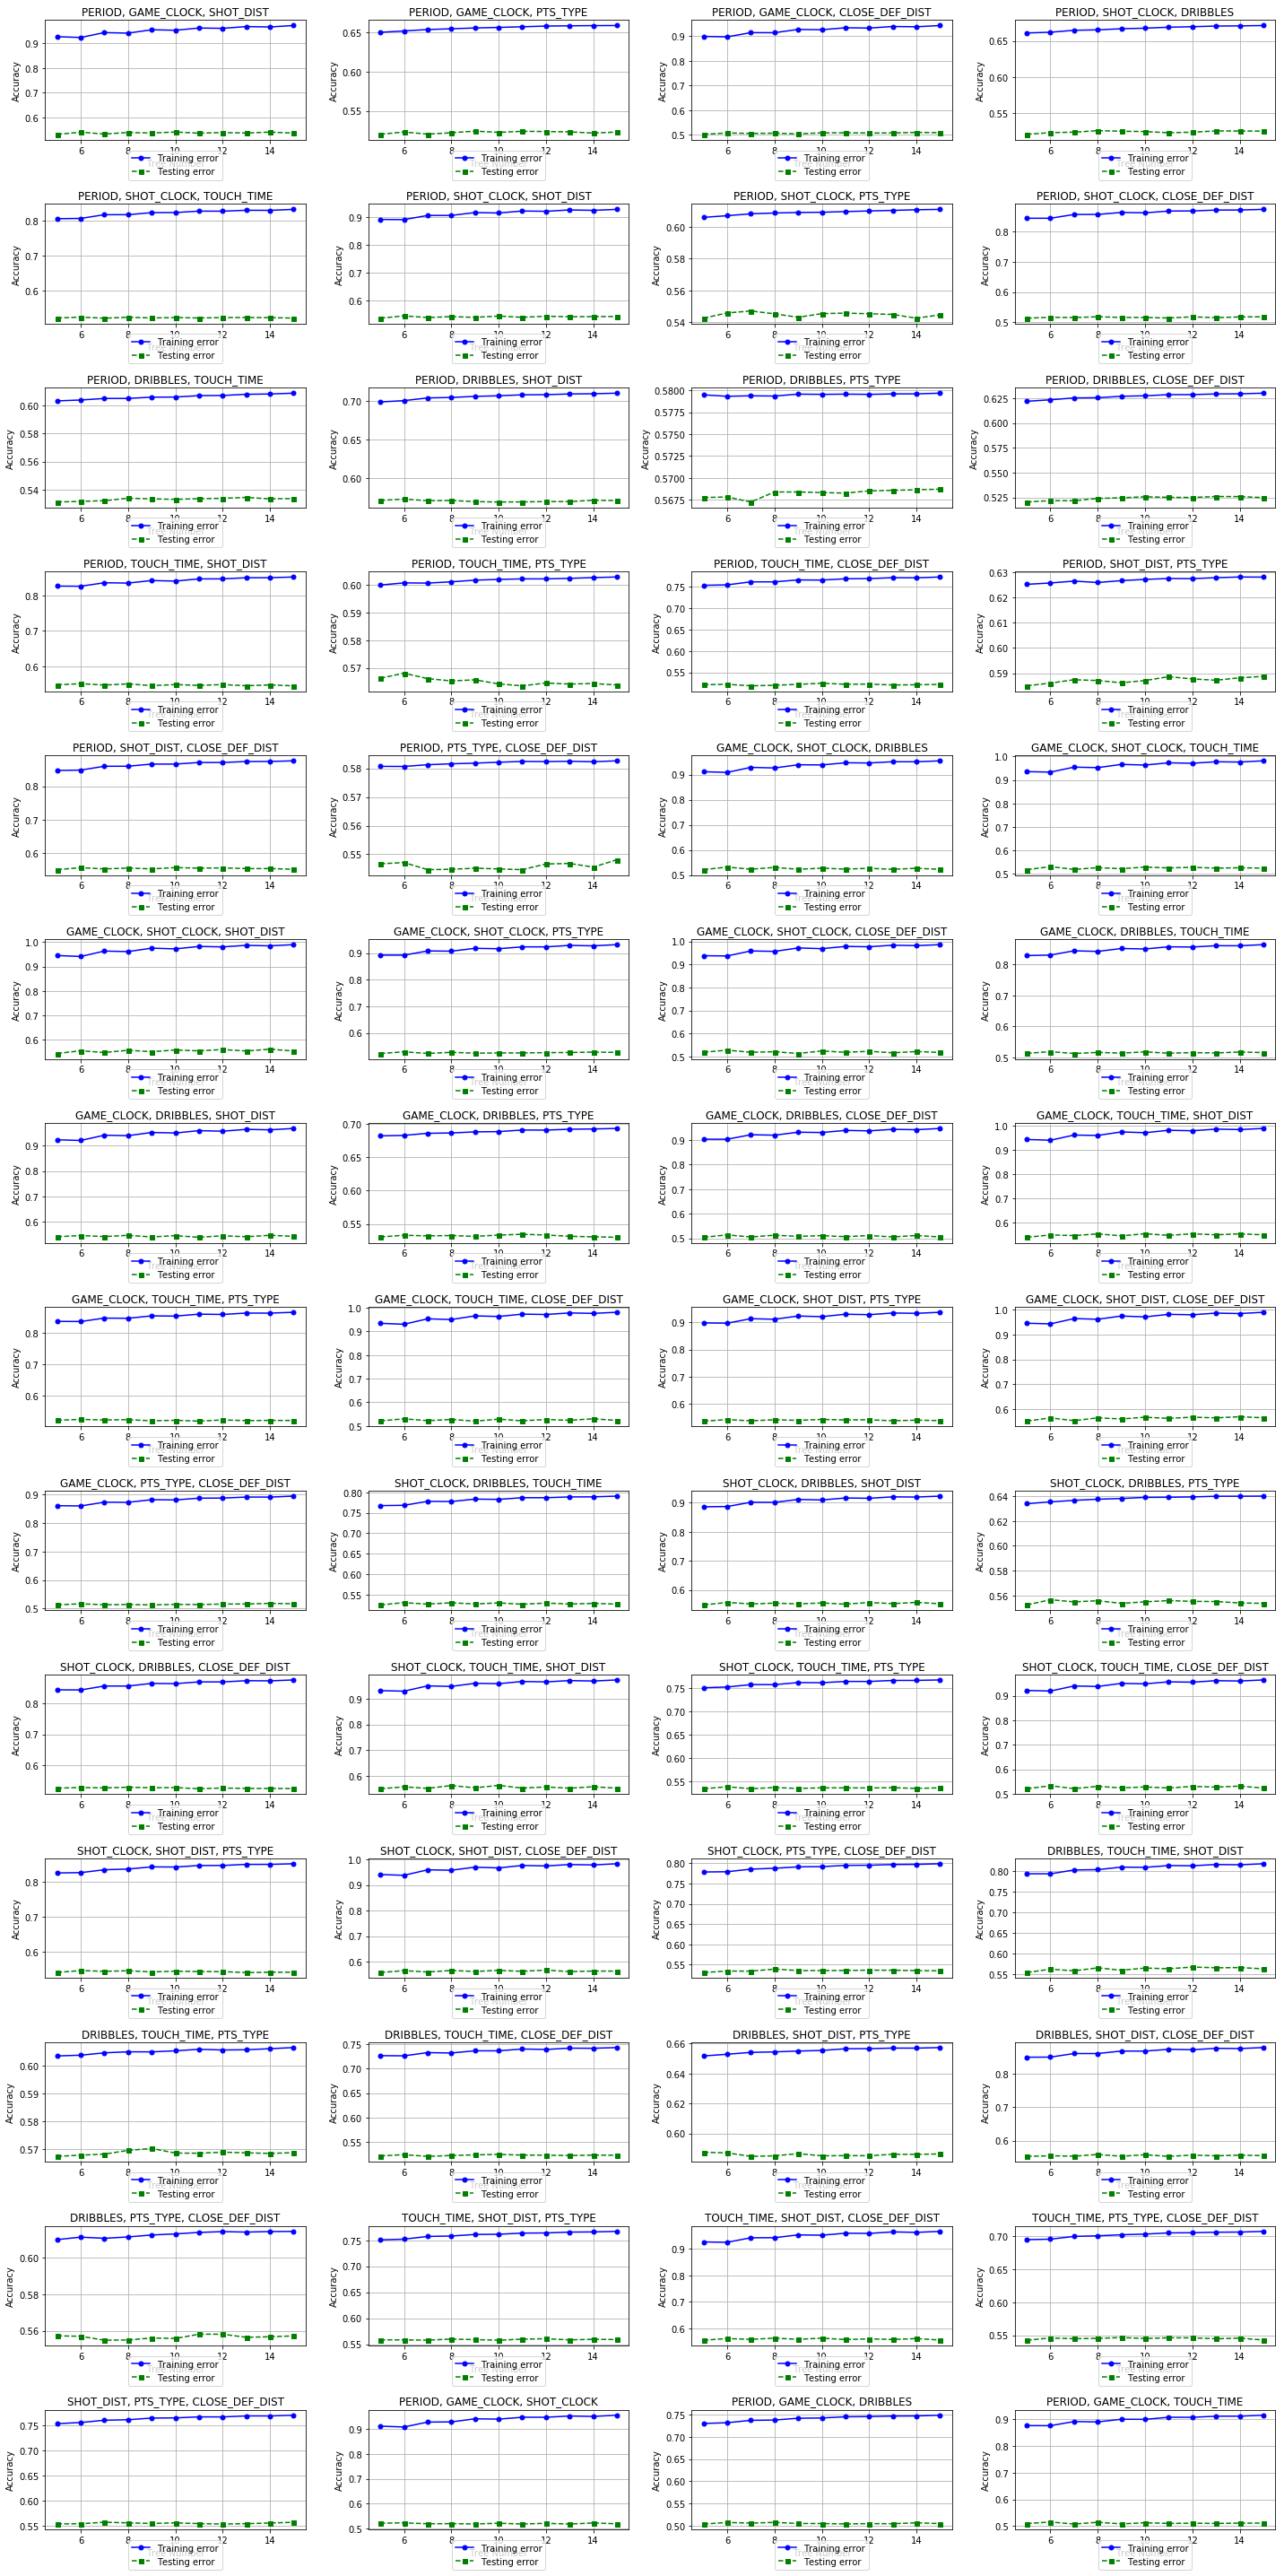

In [20]:
#Plot all accuracy with all possible features pair
trees_num = [5,6,7,8,9,10,11,12,13,14,15]
col = X_orig.columns
pair_count = 0


fig, axs = plt.subplots(14, 4, figsize=(20,40))

for i in range(X_train.shape[1] - 2):
    for j in range(i + 1, X_train.shape[1] - 1):
        for k in range(j + 1, X_train.shape[1]):
            pair_count += 1;
            X_case = X_orig[[col[i], col[j], col[k]]].values
            y_case = y_train

            X_case_train, X_case_valid, y_case_train, y_case_valid = train_test_split(
                X_case, y_case, test_size=0.3, random_state=0)

            
            subplt = axs[int(pair_count / 4) - 1, pair_count % 4]
            
            all_testing_acr = []
            all_training_acr = []
            for t in trees_num:
                forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=t, 
                                random_state=1,
                                n_jobs=2)
                
                forest.fit(X_case_train, y_case_train.ravel())

                y_train_pred = forest.predict(X_case_train)
                y_test_pred = forest.predict(X_case_valid)
                
                training_acr = accuracy_score(y_case_train, y_train_pred)
                testing_acr = accuracy_score(y_case_valid, y_test_pred)
                
                all_training_acr.append(training_acr)
                all_testing_acr.append(testing_acr)

                
            subplt.plot(trees_num, all_training_acr,
                color='blue', marker='o',
                markersize=5,
                label='Training error')

            subplt.plot(trees_num, all_testing_acr,
                color='green', linestyle='--',
                marker='s', markersize=5,
                label='Testing error')
            subplt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
            subplt.set_title(col[i] + ", " + col[j] + ", " + col[k])
            subplt.set_xlabel('Tree Number')
            subplt.set_ylabel('Accuracy') 
            subplt.grid()
            
            plt.tight_layout()
            
plt.show()

<div style="background-color:#F0F8FF;">
    <center>
        <h3 style="color:purple; font-size:25px; font-family:Andale Mono,monospace;">Decision Tree Classifier</h3>
    </center>
</div>

In [21]:
# criterion : impurity function
# max_depth : maximum depth of tree
# random_state : seed of random number generator
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=3, 
                              random_state=0)

tree.fit(X_train_Sub, y_train_Sub)

y_train_pred = tree.predict(X_train_Sub)
y_pred = tree.predict(X_valid)

print('Training Accuracy: %.2f, Testing Accuracy: %.2f (Decision Tree Classifier)' 
      % (accuracy_score(y_train_Sub, y_train_pred), accuracy_score(y_valid, y_pred)))

Training Accuracy: 0.62, Testing Accuracy: 0.62 (Decision Tree Classifier)


<table style="float:left; width:60%; font-size:16px;">
    <tr>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>DATA</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>ACCURACY</b>
        </th>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Training Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>62%</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Validity Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>62%</b>
        </td>
    </tr>
</table>

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">Plot all accuracy with all possible features pair</font>
</div>

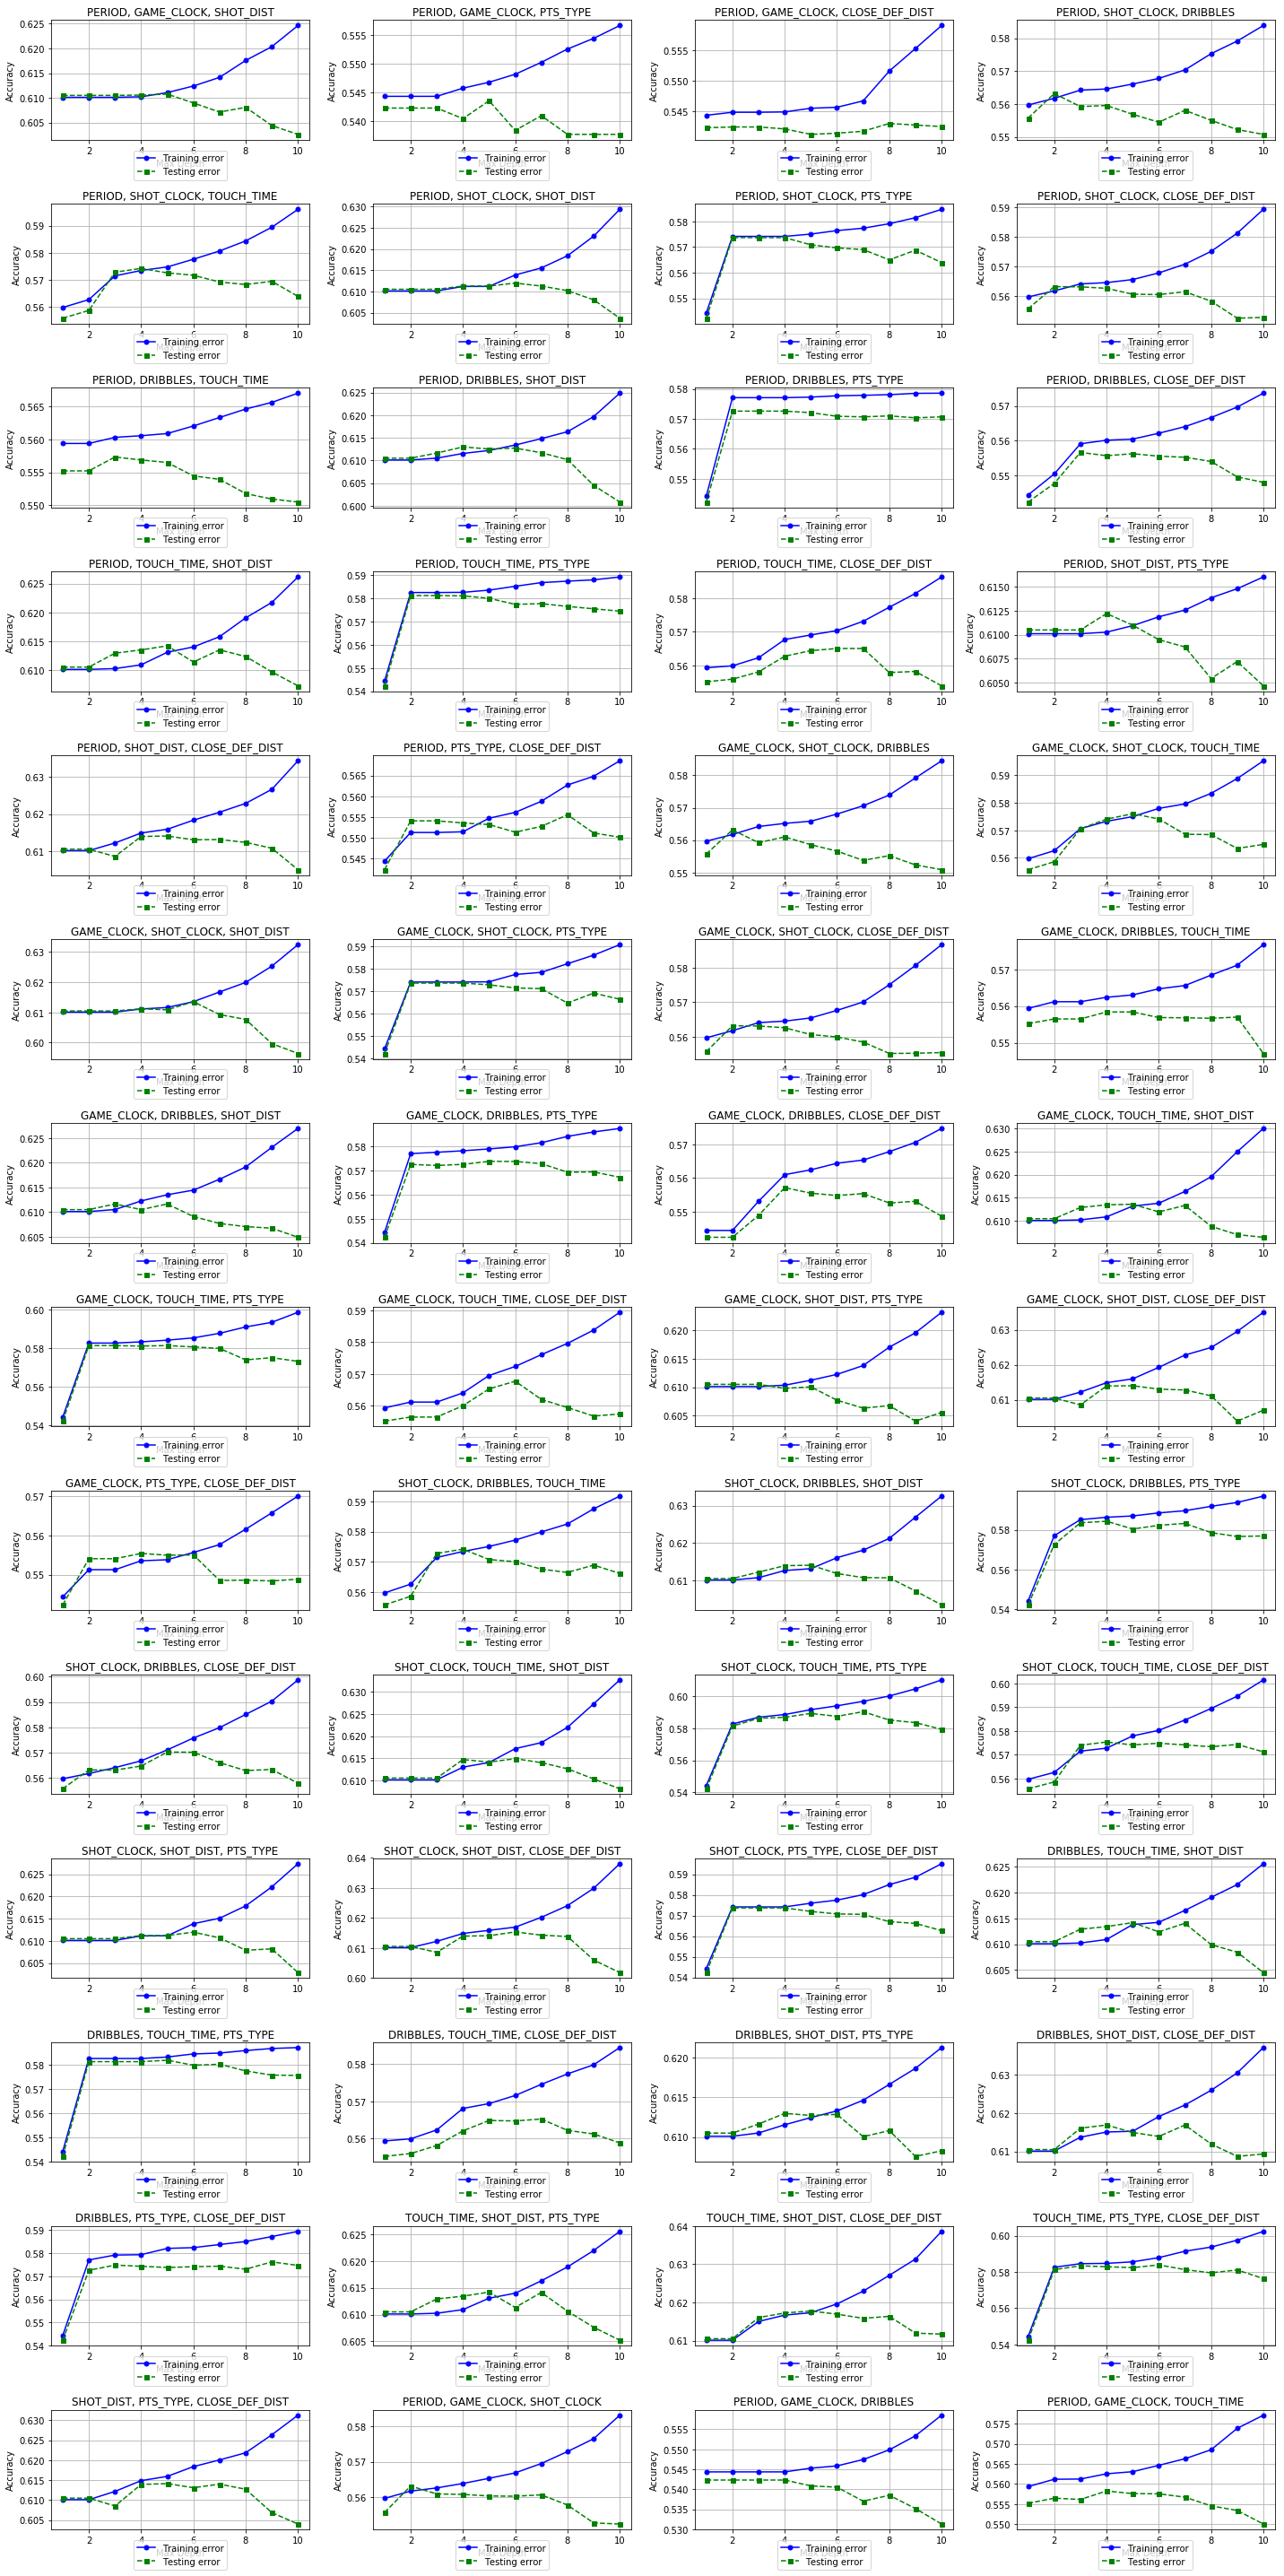

In [22]:
#Plot all accuracy with all possible features pair
depth_tree = [1,2,3,4,5,6,7,8,9,10]
col = X_orig.columns
pair_count = 0


fig, axs = plt.subplots(14, 4, figsize=(20,40))

for i in range(X_train.shape[1] - 2):
    for j in range(i + 1, X_train.shape[1] - 1):
        for k in range(j + 1, X_train.shape[1]):
            pair_count += 1;
            X_case = X_orig[[col[i], col[j], col[k]]].values
            y_case = y_train

            X_case_train, X_case_valid, y_case_train, y_case_valid = train_test_split(
                X_case, y_case, test_size=0.3, random_state=0)

            
            subplt = axs[int(pair_count / 4) - 1, pair_count % 4]
            
            all_testing_acr = []
            all_training_acr = []
            for d in depth_tree:
                tree = DecisionTreeClassifier(criterion='entropy', 
                                          max_depth=d, 
                                          random_state=0)
                tree.fit(X_case_train, y_case_train)

                y_train_pred = tree.predict(X_case_train)
                y_test_pred = tree.predict(X_case_valid)
                
                training_acr = accuracy_score(y_case_train, y_train_pred)
                testing_acr = accuracy_score(y_case_valid, y_test_pred)
                
                all_training_acr.append(training_acr)
                all_testing_acr.append(testing_acr)

                
            subplt.plot(depth_tree, all_training_acr,
                color='blue', marker='o',
                markersize=5,
                label='Training error')

            subplt.plot(depth_tree, all_testing_acr,
                color='green', linestyle='--',
                marker='s', markersize=5,
                label='Testing error')
            subplt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
            subplt.set_title(col[i] + ", " + col[j] + ", " + col[k])
            subplt.set_xlabel('Max Depth')
            subplt.set_ylabel('Accuracy') 
            subplt.grid()
            
            plt.tight_layout()
            
plt.show()

<div style="background-color:#F0F8FF;">
    <center>
        <h3 style="color:purple; font-size:25px; font-family:Andale Mono,monospace;"> Conclusion </h3>
    </center>
    <font style="font-size:20px; font-family:Andale Mono,monospace;">We could see that Decision Tree Classifier gives better and more stable on both training and testing accuracy.Hence, I decided to use Decision Tree Classifier as my Training Model.
    According to the graph above(Brutal Force), I have chosen DRIBBLES, SHOT_DIST, CLOSE_DEF_DIST as the three features.
    </font>
</div>

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">
        Graph below shows the error curve of my model with three features.
    </font>
</div>

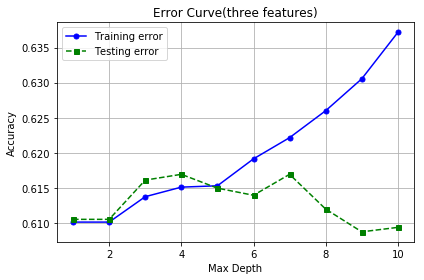

In [23]:
X_case = X_orig[['DRIBBLES', 'SHOT_DIST', 'CLOSE_DEF_DIST']].values
y_case = y_train

X_case_train, X_case_valid, y_case_train, y_case_valid = train_test_split(
    X_case, y_case, test_size=0.3, random_state=0)
                
all_testing_acr = []
all_training_acr = []
                
for d in range(1,11):
    tree = DecisionTreeClassifier(criterion='entropy', 
                                              max_depth=d, 
                                              random_state=0)
    tree.fit(X_case_train, y_case_train)

    y_train_pred = tree.predict(X_case_train)
    y_test_pred = tree.predict(X_case_valid)

    training_acr = accuracy_score(y_case_train, y_train_pred)
    testing_acr = accuracy_score(y_case_valid, y_test_pred)
            
    all_training_acr.append(training_acr)
    all_testing_acr.append(testing_acr)
                
plt.plot(depth_tree, all_training_acr,
                color='blue', marker='o',
                markersize=5,
                label='Training error')

plt.plot(depth_tree, all_testing_acr,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Testing error')
plt.legend(loc='upper left')
plt.title("Error Curve(three features)")
plt.xlabel('Max Depth')
plt.ylabel('Accuracy') 
plt.grid()

plt.tight_layout()
            
plt.show()

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">
        Graph below shows the error curve of my model with all features.
    </font>
</div>

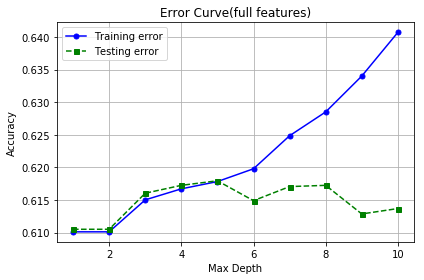

In [24]:
X_case = X_orig
y_case = y_train

X_case_train, X_case_valid, y_case_train, y_case_valid = train_test_split(
    X_case, y_case, test_size=0.3, random_state=0)
                
all_testing_acr = []
all_training_acr = []
                
for d in range(1,11):
    tree = DecisionTreeClassifier(criterion='entropy', 
                                              max_depth=d, 
                                              random_state=0)
    tree.fit(X_case_train, y_case_train)

    y_train_pred = tree.predict(X_case_train)
    y_test_pred = tree.predict(X_case_valid)

    training_acr = accuracy_score(y_case_train, y_train_pred)
    testing_acr = accuracy_score(y_case_valid, y_test_pred)
            
    all_training_acr.append(training_acr)
    all_testing_acr.append(testing_acr)
                
plt.plot(depth_tree, all_training_acr,
                color='blue', marker='o',
                markersize=5,
                label='Training error')

plt.plot(depth_tree, all_testing_acr,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Testing error')
plt.legend(loc='upper left')
plt.title("Error Curve(full features)")
plt.xlabel('Max Depth')
plt.ylabel('Accuracy') 
plt.grid()

plt.tight_layout()
            
plt.show()

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">Its easy to notice that it becomes overfit when the depth of the decision tree greater than 5.Thus, the decision tree with depth 4 will be chosen as the training model that produce y_pred data.</font>
    <br />
    <font style="font-size:20px; font-family:Andale Mono,monospace;">Here is the result with using all features</font>
</div>

In [25]:
X_case = X_orig
y_case = y_train
X_case_test = X_test_orig

X_case_train, X_case_valid, y_case_train, y_case_valid = train_test_split(
    X_case, y_case, test_size=0.3, random_state=0)

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=4, 
                              random_state=0)
tree.fit(X_case_train, y_case_train)

y_train_pred = tree.predict(X_case_train)
y_test_pred = tree.predict(X_case_valid)

print('Training Accuracy: %.3f, Testing Accuracy: %.3f (Decision Tree Classifier)' 
      % (accuracy_score(y_case_train, y_train_pred), accuracy_score(y_case_valid, y_test_pred)))

Training Accuracy: 0.617, Testing Accuracy: 0.617 (Decision Tree Classifier)


<table style="float:left; width:60%; font-size:16px;">
    <tr>
        <th colspan="2" style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            FULL FEATURES
        </th>
    </tr>
    <tr>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>DATA</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>ACCURACY</b>
        </th>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Training Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>61.7%</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Validity Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>61.7%</b>
        </td>
    </tr>
</table>

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">Here is the result with using only three suitable features</font>
</div>

In [26]:
X_case = X_orig[['DRIBBLES', 'SHOT_DIST', 'CLOSE_DEF_DIST']].values
y_case = y_train
X_case_test = X_test_orig[['DRIBBLES', 'SHOT_DIST', 'CLOSE_DEF_DIST']].values

X_case_train, X_case_valid, y_case_train, y_case_valid = train_test_split(
    X_case, y_case, test_size=0.3, random_state=0)

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=4, 
                              random_state=0)
tree.fit(X_case_train, y_case_train)

y_train_pred = tree.predict(X_case_train)
y_test_pred = tree.predict(X_case_valid)

#Testing data prediction
y_pred = tree.predict(X_case_test)

#Add Column Name
y_pred = np.append(['FGM'], y_pred)

print('Training Accuracy: %.3f, Testing Accuracy: %.3f (Decision Tree Classifier)' 
      % (accuracy_score(y_case_train, y_train_pred), accuracy_score(y_case_valid, y_test_pred)))

Training Accuracy: 0.615, Testing Accuracy: 0.617 (Decision Tree Classifier)


<table style="float:left; width:60%; font-size:16px;">
    <tr>
        <th colspan="2" style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            THREE FEATURES
        </th>
    </tr>
    <tr>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>DATA</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>ACCURACY</b>
        </th>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Training Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>61.5%</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>Validity Data</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>61.7%</b>
        </td>
    </tr>
</table>

<div style="background-color:#F0F8FF;">
    <font style="font-size:20px; font-family:Andale Mono,monospace;">Export y_pred to csv file</font>
</div>

In [27]:
if not os.path.exists('./output'):
  os.makedirs('./output')
np.savetxt("output/y_pred.csv", y_pred, fmt="%s", delimiter=",")